# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

In [1]:
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk

In [2]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juanl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juanl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
dataset = pd.read_json('dataset_es_dev.json', orient = 'records', lines=True)

In [4]:
dataset.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


In [5]:
dataset.shape

(5000, 8)

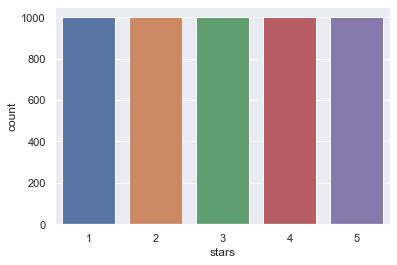

In [6]:
sns.countplot(data= dataset, x="stars")
plt.show()

In [7]:
index_random = np.random.randint(1,5000)
titular = dataset.review_body.iloc[index_random]
print(index_random, titular)


2623 Modifico la opinión, porque realmente es malo. Me bloquea el sensor de huella, y se ensucia muchísimo, en comparación con el propio cristal del móvil.


In [8]:
print(index_random, dataset.stars.iloc[index_random])


2623 3


### Tokenizar

In [9]:
index_random = np.random.randint(0,high = dataset.shape[0])
review = dataset.iloc[index_random].review_body
print(index_random, review)


3313 Fundas resistentes como a mi me gustan para mis cosas que ya no se encontraban en ninguna tienda de informatica


In [10]:
review_st= nltk.tokenize.word_tokenize(review)
review_st



['Fundas',
 'resistentes',
 'como',
 'a',
 'mi',
 'me',
 'gustan',
 'para',
 'mis',
 'cosas',
 'que',
 'ya',
 'no',
 'se',
 'encontraban',
 'en',
 'ninguna',
 'tienda',
 'de',
 'informatica']

In [11]:
stopwords = nltk.corpus.stopwords.words('spanish')
#stopwords = [palabra for palabra in stopwords if not in palabra]


In [12]:
stopwords

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [13]:
review_wt_sin_sw= [word for word in review_st if word not in stopwords]
review_wt_sin_sw

['Fundas',
 'resistentes',
 'gustan',
 'cosas',
 'encontraban',
 'ninguna',
 'tienda',
 'informatica']

In [14]:
freq = nltk.FreqDist(review_wt_sin_sw)
freq

FreqDist({'Fundas': 1, 'resistentes': 1, 'gustan': 1, 'cosas': 1, 'encontraban': 1, 'ninguna': 1, 'tienda': 1, 'informatica': 1})

  ### Stemmer

In [15]:
# Importamos esta libreria que nos permite reemplzar caracteres
import re

# Importamos la función que nos permite Stemmizar de nltk y definimos el stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

#from nltk.stem import SnowballStemmer
#stemmer_spanish = SnowballStemmer('spanish')

In [16]:
# Recorremos todos los review y le vamos aplicando la Normalizacion y luega el Stemming a cada uno
review_list=[]
simb=["!",".",",","no","si","...",")","("]
todas_palabras_list=[]
for review in dataset.review_body:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    #review=re.sub("[^a-zA-Z]"," ",str(review))
    # Pasamos todo a minúsculas
    review=review.lower()
    # Tokenizamos para separar las palabras del review
    review=nltk.word_tokenize(review)
    # Eliminamos las palabras de menos de 3 letras
    #titular = [palabra for palabra in titular if len(palabra)>3]
    # Sacamos las Stopwords
    review = [palabra for palabra in review if not palabra in stopwords if not palabra in simb]
    
    ## Hasta acá Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    review = [stemmer.stem(palabra) for palabra in review]
    #review = [palabra for palabra in review]
    # Por ultimo volvemos a unir el titular
    todas_palabras_list.append(review)
    review = " ".join(review)
    
    # Vamos armando una lista con todos los titulares
    review_list.append(review)
    


In [17]:
todas_palabras_list[0:10]

[['malisimo',
  'grand',
  'demasiado',
  'aparatoso',
  'mal',
  'protector',
  'pantalla'],
 ['recibido', 'pedido', 'devolución'],
 ['buscar',
  'sistema',
  'funciona',
  'bien',
  'abrazadera',
  'lleva',
  'agarrar',
  'manillar',
  'aprieta',
  'bien',
  'deslizando',
  'linterna',
  'hacia',
  'abajo'],
 ['utilicé',
  'broca',
  'menor',
  'diámetro',
  'doblaron',
  'varia',
  'mantequilla',
  'hacer',
  'mínima',
  'presión',
  'vez',
  'doblada',
  'intentar',
  'enderezarla',
  'parten',
  'exteriorment',
  'amarilla',
  'interior',
  'fundido',
  'gri',
  'peor',
  'compra',
  'hecho',
  'bastant',
  'tiempo'],
 ['gusta', 'olor', 'viejo', 'aspecto', 'malo'],
 ['hola', 'despué', 'recog', 'paquet', 'llegado', 'bola', 'rota'],
 ['part',
  'poder',
  'elegir',
  'color',
  'envian',
  'cesto',
  'color',
  'asa',
  'imagino',
  'aprovechando',
  'van',
  'rompiendo',
  'dicen',
  'color',
  'aleatorio',
  'foto',
  'cesta',
  'asa',
  'mismo',
  'color',
  'recomiendo',
  'comp

In [18]:
flat_list = [item for t in todas_palabras_list for item in t]
flat_list[0:10]

['malisimo',
 'grand',
 'demasiado',
 'aparatoso',
 'mal',
 'protector',
 'pantalla',
 'recibido',
 'pedido',
 'devolución']

In [19]:
freq = nltk.FreqDist(flat_list)
freq

FreqDist({'bien': 1324, 'calidad': 742, 'producto': 642, 'precio': 534, 'buena': 509, 'bastant': 336, 'funciona': 282, 'buen': 272, 'pued': 263, 'día': 260, ...})

In [20]:
review_list[0:5]

['malisimo grand demasiado aparatoso mal protector pantalla',
 'recibido pedido devolución',
 'buscar sistema funciona bien abrazadera lleva agarrar manillar aprieta bien deslizando linterna hacia abajo',
 'utilicé broca menor diámetro doblaron varia mantequilla hacer mínima presión vez doblada intentar enderezarla parten exteriorment amarilla interior fundido gri peor compra hecho bastant tiempo',
 'gusta olor viejo aspecto malo']

In [21]:
dataset["review_stem"] = review_list
dataset.tail()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_stem
4995,es_0179515,product_es_0158275,reviewer_es_0273644,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,es,home,encantado cesta llegado impecable.tien tamaño ...
4996,es_0894902,product_es_0953259,reviewer_es_0153773,5,Desempeña su función correctamente,calidad precio,es,camera,desempeña función correctament
4997,es_0760496,product_es_0731995,reviewer_es_0171091,5,Me ha encantado la diadema! Las flores son tal...,Excelente,es,toy,encantado diadema flore tal vienen imagen vení...
4998,es_0178380,product_es_0402051,reviewer_es_0686937,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,es,wireless,gustan funda tpu funda normalment fina colorid...
4999,es_0810087,product_es_0684221,reviewer_es_0613091,5,El artículo ha cumplido con las expectativas q...,Buena calidad,es,apparel,artículo cumplido expectativa deseaba


In [22]:
dataset["review_stem"] = review_list
dataset.tail()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_stem
4995,es_0179515,product_es_0158275,reviewer_es_0273644,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,es,home,encantado cesta llegado impecable.tien tamaño ...
4996,es_0894902,product_es_0953259,reviewer_es_0153773,5,Desempeña su función correctamente,calidad precio,es,camera,desempeña función correctament
4997,es_0760496,product_es_0731995,reviewer_es_0171091,5,Me ha encantado la diadema! Las flores son tal...,Excelente,es,toy,encantado diadema flore tal vienen imagen vení...
4998,es_0178380,product_es_0402051,reviewer_es_0686937,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,es,wireless,gustan funda tpu funda normalment fina colorid...
4999,es_0810087,product_es_0684221,reviewer_es_0613091,5,El artículo ha cumplido con las expectativas q...,Buena calidad,es,apparel,artículo cumplido expectativa deseaba


In [23]:
df_freq = pd.DataFrame(list(freq.items()), columns = ["Word", "Frecuency"])
df_freq.sort_values('Frecuency',ascending=False, inplace = True)
df_freq.head(50)

,Word,Frecuency
13,bien,1324
83,calidad,742
91,producto,642
87,precio,534
563,buena,509
46,bastant,336
12,funciona,282
1203,buen,272
261,pued,263
124,día,260


### Vectorizacion

In [66]:
list_review_stem = list(dataset['review_stem'].values)
Calification = dataset['stars'].values


In [96]:
list_review_stem[1]

'recibido pedido devolución'

In [112]:
from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 10000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=10000

# Es decir que cada instancia tendrá 1000 features
cou_vec = CountVectorizer(max_features=max_features) # stop_words="english" , ngram_range=(1, 2)


In [98]:
cou_vec

CountVectorizer(max_features=10000)

In [113]:
matriz_reviews = cou_vec.fit_transform(list_review_stem)

# Tomamos las palabras
all_words = cou_vec.get_feature_names()

# Vizualizamos las 50 primeras palabras
print("50 primeras palabras: ",all_words[0:50])


50 primeras palabras:  ['05', '10', '100', '1000', '100x100', '1080', '10cm', '10mm', '11', '12', '125', '12m', '12v', '12º', '13', '130', '135', '14', '15', '150', '150w', '150x190', '15h', '15min', '16', '160', '16gb', '17', '18', '180', '180gr', '18kg', '18º', '19', '1a', '1h', '1º', '20', '200', '2000', '20000', '2001', '2006', '2007', '200w', '2011', '2017', '2018', '2019', '20ml']


In [76]:
print(all_words)

['10', '100', '15', '30', 'abajo', 'abierta', 'abierto', 'abr', 'abrir', 'acaba', 'acabado', 'acabo', 'accesorio', 'aceit', 'acept', 'aconsejo', 'adapta', 'adaptador', 'adecuado', 'adema', 'ademá', 'adhesivo', 'agrad', 'agua', 'aguanta', 'agujero', 'ahora', 'ahí', 'air', 'ajust', 'ajusta', 'alguien', 'alguna', 'algún', 'almohada', 'alta', 'altavoz', 'alto', 'altura', 'amazon', 'ancho', 'antena', 'anterior', 'anuncio', 'apaga', 'aparato', 'aparec', 'apariencia', 'apart', 'apena', 'aplicacion', 'app', 'appl', 'aquí', 'armario', 'arriba', 'articulo', 'artículo', 'asa', 'asi', 'aspecto', 'así', 'atención', 'atrá', 'audio', 'aun', 'aunqu', 'auricular', 'ayuda', 'azul', 'año', 'aún', 'baja', 'bajar', 'bajo', 'barata', 'barato', 'barra', 'base', 'bastant', 'basura', 'bateria', 'batería', 'bebé', 'bici', 'bien', 'blanca', 'blanco', 'bluetooth', 'boca', 'bola', 'bolsa', 'bolsillo', 'bolso', 'bombilla', 'bonita', 'bonito', 'bord', 'bote', 'botella', 'boton', 'botón', 'brazo', 'brillo', 'buen', '

In [81]:
type(all_words)

list

### Modelar

In [114]:
x = matriz_reviews
y = Calification
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [102]:
len(Calification)

5000

In [104]:
len(ytrain)

4000

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators = 200, random_state=42, max_depth=5)
rf.fit(xtrain,ytrain)
print("acc: ",rf.score(xtest,ytest))

acc:  0.379


In [116]:
print("acc: ",rf.score(xtrain,ytrain))

acc:  0.54025


In [117]:
xtrain.shape

(4000, 9441)

### SVM

In [118]:
from sklearn.svm import SVC
model = SVC(gamma='auto')
model.fit(xtrain,ytrain)

SVC(gamma='auto')

In [119]:
print("acc: ", model.score(xtest,ytest))

acc:  0.283


In [24]:
pip list

Package                            Version
---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                             3.2

In [25]:
import spacy
import spacy_spanish_lemmatizer
# Change "es" to the Spanish model installed in step 2
nlp = spacy.load("es_core_news_sm")
nlp.replace_pipe("lemmatizer", "spanish_lemmatizer")
for token in nlp(
    """Con estos fines, la Dirección de Gestión y Control Financiero monitorea
       la posición de capital del Banco y utiliza los mecanismos para hacer un
       eficiente manejo del capital."""
):
    print(token.text, token.lemma_)

Con con
estos este
fines fin
, ,
la el
Dirección dirección
de de
Gestión gestión
y y
Control control
Financiero financiero
monitorea monitorea

        
       
la el
posición posición
de de
capital capital
del del
Banco banco
y y
utiliza utilizar
los el
mecanismos mecanismo
para para
hacer hacer
un un

        
       
eficiente eficiente
manejo manejo
del del
capital capital
. .


In [26]:
# Import the spannish language class
from spacy.lang.es import Spanish

# Create the nlp object
nlp = Spanish()

# Process a text (this is a Spanish for: )
doc = nlp("¿Cómo estás?")
print(doc)

¿Cómo estás?


In [27]:
import spacy
from spacy.lang.es.examples import sentences 

nlp = spacy.load("es_core_news_sm")
doc = nlp(sentences[0])
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.dep_)

Apple está buscando comprar una startup del Reino Unido por mil millones de dólares.
Apple PROPN nsubj
está AUX aux
buscando VERB ROOT
comprar VERB xcomp
una DET det
startup NOUN obj
del ADP case
Reino PROPN nmod
Unido PROPN flat
por ADP case
mil NUM nummod
millones NOUN nmod
de ADP case
dólares NOUN nmod
. PUNCT punct


In [28]:
nlp = Spanish()

In [29]:
lista_chica= dataset[["review_title", "stars"]]
lista_chica

,review_title,stars
0,Mala compra,1
1,No lo he recibido,1
2,Que no aprieta bien en el manillar,1
3,Brocas de mantequilla,1
4,No me gusta,1
...,...,...
4995,guadalupe,5
4996,calidad precio,5
4997,Excelente,5
4998,Genial,5


In [30]:
print(index_random, lista_chica.stars.iloc[index_random])

3313 4


In [31]:
review_list=[]
simb=["!",".",",","no","si","...",")","("]
todaslaspalabras=[]
for review_title in lista_chica.review_title:
    review=review_title.lower()
    review=nltk.word_tokenize(review)
    review = [palabra for palabra in review if not palabra in stopwords if not palabra in simb]
    review=[stemmer.stem(palabra) for palabra in review]
    todaslaspalabras.append(review)
    review=" ".join(review)
    review_list.append(review)
flat_list2 = [item for t in todaslaspalabras for item in t]
flat_list2[0:30]

['mala',
 'compra',
 'recibido',
 'aprieta',
 'bien',
 'manillar',
 'broca',
 'mantequilla',
 'gusta',
 'bola',
 'rota',
 'part',
 'poder',
 'elegir',
 'color',
 'tapa',
 'pantalla',
 'recibido',
 'producto',
 'patata',
 'desliza',
 'hacia',
 'abajo',
 'rato',
 'comprar',
 'recog',
 'sirv',
 'endebl',
 'nunca',
 'entregaron']

In [32]:
freq2 = nltk.FreqDist(flat_list2)
freq2

FreqDist({'calidad': 360, 'bien': 308, 'buena': 245, 'producto': 191, 'buen': 188, 'precio': 187, 'mala': 110, 'mal': 108, 'perfecto': 105, 'bueno': 96, ...})

In [33]:
lista_chica_freq = pd.DataFrame(list(freq2.items()), columns = ["Word", "Frecuency"])
lista_chica_freq.sort_values('Frecuency',ascending=False, inplace = True)
lista_chica_freq.head(50)

,Word,Frecuency
44,calidad,360
4,bien,308
269,buena,245
17,producto,191
619,buen,188
486,precio,187
0,mala,110
71,mal,108
1024,perfecto,105
517,bueno,96


In [34]:
lista_chica_freq= lista_chica_freq[["Word","Frecuency"]]
lista_chica_freq

,Word,Frecuency
44,calidad,360
4,bien,308
269,buena,245
17,producto,191
619,buen,188
...,...,...
1455,ponerla,1
1454,valeria,1
1453,peligrosa,1
1452,cejilla,1


In [35]:
# Procesa el texto
doc = nlp(lista_chica)

for token in doc:
    # Obtén el texto del token, el part-of-speech tag y el dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    # Esto es solo por formato
    print("{:<12}{:<10}{:<10}".format(token_text, token_pos, token_dep))ichas
for ent in doc.ents:
    # Imprime en pantalla el texto de la entidad y su label
    print(ent.text, ent.label_)

SyntaxError: invalid syntax (<ipython-input-35-c4faae0ba3a9>, line 10)

In [36]:
dataset_stars_1= dataset[dataset.stars==1]
dataset_stars_1.head()



,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_stem
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless,malisimo grand demasiado aparatoso mal protect...
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel,recibido pedido devolución
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports,buscar sistema funciona bien abrazadera lleva ...
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement,utilicé broca menor diámetro doblaron varia ma...
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty,gusta olor viejo aspecto malo


In [37]:
stemmer_1 = PorterStemmer()

In [38]:
review_1=[]
simb=["!",".",",","no","si","...",")","("]
todaslaspalabras_1=[]
for review in dataset_stars_1.review_title:
    review =review.lower()
    review=nltk.word_tokenize(review)
    review= [palabra for palabra in review if not palabra in stopwords if not palabra in simb]
    review=[stemmer_1.stem(palabra) for palabra in review]
    todaslaspalabras_1.append(review)
    review=" ".join(review)
    review_1.append(review)
    


In [39]:
todaslaspalabras_1

[['mala', 'compra'],
 ['recibido'],
 ['aprieta', 'bien', 'manillar'],
 ['broca', 'mantequilla'],
 ['gusta'],
 ['bola', 'rota'],
 ['part', 'poder', 'elegir', 'color'],
 ['tapa', 'pantalla'],
 ['recibido', 'producto'],
 ['patata'],
 ['desliza', 'hacia', 'abajo', 'rato'],
 ['comprar'],
 ['recog'],
 ['sirv'],
 ['endebl'],
 ['nunca', 'entregaron', 'juego'],
 ['malo'],
 ['bolsita'],
 ['llegado'],
 ['recomiendo'],
 ['corona'],
 ['resistent'],
 ['mamá'],
 ['embalaj', 'directament', 'caja'],
 ['malisimo'],
 ['estafa'],
 ['materi', 'poca', 'calidad'],
 ['cubierta', 'asiento'],
 ['funciona'],
 ['difícil', 'limpiar'],
 ['deja', 'funcionar'],
 ['pequeño'],
 ['exploto', 'nunca', 'repusieron'],
 ['mala', 'calidad'],
 ['mala', 'calidad'],
 ['alimentador', 'soport'],
 ['van', 'cono'],
 ['recibido', 'paquet'],
 ['paga', 'devolucion'],
 ['producto', 'averiado'],
 ['funcionado', 'primer', 'momento'],
 [],
 ['endebl'],
 ['volver', 'comprar'],
 ['producto', 'usado', 'incompleto'],
 ['silla', 'pieza'],
 ['ma

In [40]:
flat_list_1s = [item for t in todaslaspalabras_1 for item in t]
flat_list_1s[0:30]

['mala',
 'compra',
 'recibido',
 'aprieta',
 'bien',
 'manillar',
 'broca',
 'mantequilla',
 'gusta',
 'bola',
 'rota',
 'part',
 'poder',
 'elegir',
 'color',
 'tapa',
 'pantalla',
 'recibido',
 'producto',
 'patata',
 'desliza',
 'hacia',
 'abajo',
 'rato',
 'comprar',
 'recog',
 'sirv',
 'endebl',
 'nunca',
 'entregaron']

In [41]:
freq_1star = nltk.FreqDist(flat_list_1s)
freq_1star

FreqDist({'calidad': 55, 'mala': 53, 'producto': 52, 'mal': 37, 'funciona': 27, 'roto': 23, 'malo': 21, 'nunca': 20, 'llegado': 20, 'comprar': 18, ...})

In [42]:
df_freq_1 = pd.DataFrame(list(freq_1star.items()), columns = ["Word", "Frecuency"])
df_freq_1.sort_values('Frecuency',ascending=False, inplace = True)
df_freq_1.head()

,Word,Frecuency
44,calidad,55
0,mala,53
17,producto,52
71,mal,37
47,funciona,27


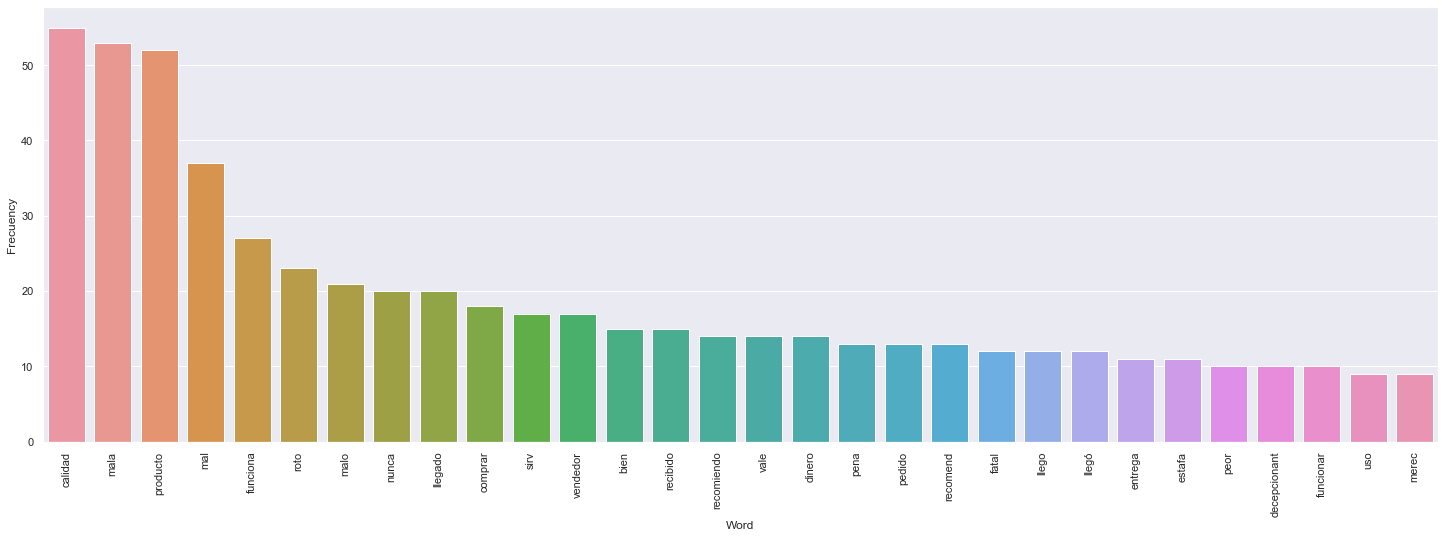

In [43]:
plt.figure(figsize = (25,8))
plot_1 = sns.barplot(x  = df_freq_1.iloc[:30].Word, y = df_freq_1.iloc[:30].Frecuency)
for item in plot_1.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [44]:
dataset_stars_2= dataset[dataset.stars==2]
dataset_stars_2

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_stem
1000,es_0118732,product_es_0968323,reviewer_es_0145809,2,Me han enviado algo completamente diferente. E...,Muy mal,es,home,enviado completament diferent diferencia foto ...
1001,es_0696968,product_es_0860895,reviewer_es_0999762,2,En menos de 2 semanas de uso una de las mangas...,Baja calidad de producto,es,kitchen,meno 2 semana uso manga roto sido po enganchon...
1002,es_0874902,product_es_0170859,reviewer_es_0981966,2,"Hicimos el pedido de la barrera, hasta ahí tod...",Decepcionados con el embalaje y el estado del ...,es,baby_product,hicimo pedido barrera ahí bien llego podéi ver...
1003,es_0773654,product_es_0429247,reviewer_es_0191603,2,Queda grande no es una S pero se puede arregla...,Mas o menos,es,apparel,queda grand s pued arreglar gracia
1004,es_0532571,product_es_0293429,reviewer_es_0799746,2,En 5 días de uso se ha roto el pulsador de pue...,Poca calidad,es,home_improvement,5 día uso roto pulsador puesta marcha correa d...
...,...,...,...,...,...,...,...,...,...
1995,es_0030937,product_es_0714707,reviewer_es_0625309,2,"Son muy pequeños,pensé que eran más grandes. N...",Ana Maria,es,jewelry,pequeño pensé grand gusta tamaño bonito volver...
1996,es_0056828,product_es_0000924,reviewer_es_0953528,2,Es la segunda vez que lo compro. La primera ve...,Capsulas Café,es,grocery,segunda vez compro primera vez gustó segunda v...
1997,es_0461030,product_es_0254933,reviewer_es_0016628,2,"Tengo que decir que el aparato va bien, pero a...",NO ME HA FUNCIONADO,es,personal_care_appliances,decir aparato va bien acné moderado hecho
1998,es_0956731,product_es_0005514,reviewer_es_0637278,2,Para bebés nada preciso. No lo recomiendo nada...,No recomendado para bebes,es,personal_care_appliances,bebé preciso recomiendo mejor termometro toda ...


In [45]:
review_2=[]
simb=["!",".",",","no","si","...",")","("]
todaslaspalabras_2=[]
for review in dataset_stars_2.review_title:
    review =review.lower()
    review=nltk.word_tokenize(review)
    review= [palabra for palabra in review if not palabra in stopwords if not palabra in simb]
    review=[stemmer_1.stem(palabra) for palabra in review]
    todaslaspalabras_2.append(review)
    review=" ".join(review)
    review_2.append(review)
    flat_list_2s = [item for t in todaslaspalabras_2 for item in t]
 

In [46]:
flat_list_2s[0:30]

['mal',
 'baja',
 'calidad',
 'producto',
 'decepcionado',
 'embalaj',
 '1er',
 'artículo',
 'ma',
 'meno',
 'poca',
 'calidad',
 'casi',
 'juguet',
 'podria',
 'ser',
 'mejor',
 'tablet',
 'encajo',
 'dunda',
 'quedaba',
 'grand',
 'cuchilla',
 'afeitar',
 'venia',
 'impreso',
 'reve',
 'pequeño',
 'aguanta',
 'movil']

In [47]:
freq_2star = nltk.FreqDist(flat_list_2s)
freq_2star

FreqDist({'calidad': 84, 'bien': 52, 'mala': 47, 'mal': 29, 'poca': 25, 'producto': 23, 'mejor': 23, 'funciona': 22, 'precio': 21, 'esperaba': 20, ...})

In [48]:
df_freq_2 = pd.DataFrame(list(freq_2star.items()), columns = ["Word", "Frecuency"])
df_freq_2.sort_values('Frecuency',ascending=False, inplace = True)
df_freq_2.head()

,Word,Frecuency
2,calidad,84
122,bien,52
100,mala,47
0,mal,29
10,poca,25


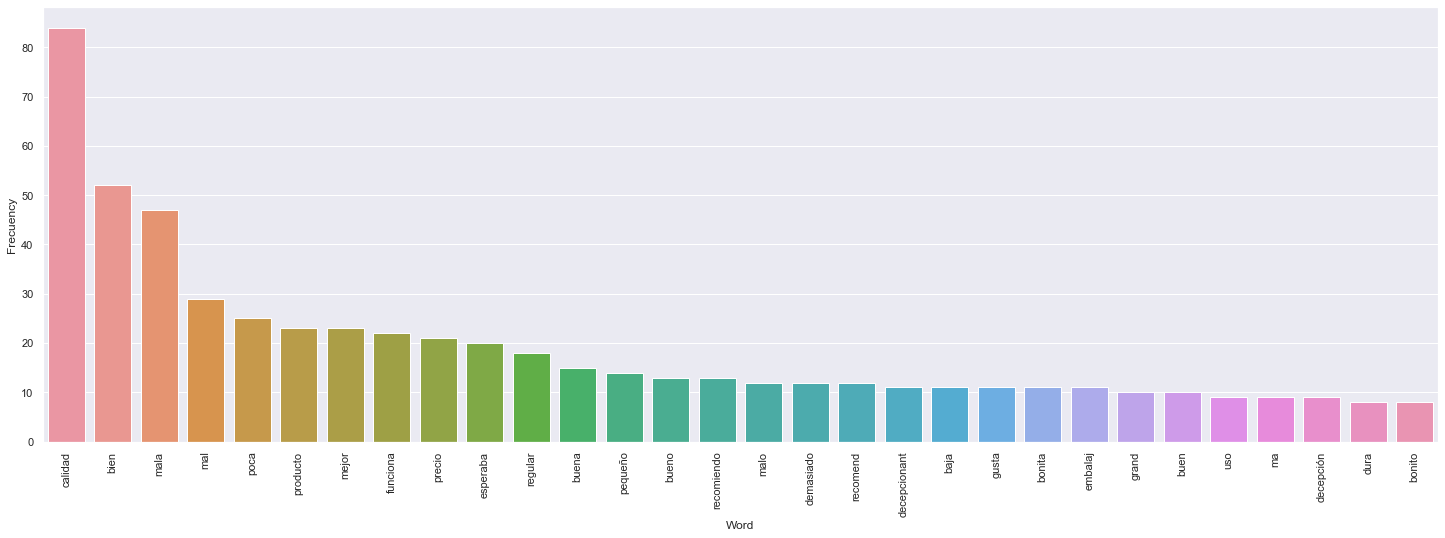

In [49]:
plt.figure(figsize = (25,8))
plot_2 = sns.barplot(x  = df_freq_2.iloc[:30].Word, y = df_freq_2.iloc[:30].Frecuency)
for item in plot_2.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [50]:
dataset_stars_3= dataset[dataset.stars==3]
dataset_stars_3

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_stem
2000,es_0176929,product_es_0553307,reviewer_es_0240217,3,"Nos gusto por su color, tejido y calidad de es...",Encaja,es,lawn_and_garden,gusto color tejido calidad espuma recomend
2001,es_0032372,product_es_0720285,reviewer_es_0348916,3,"Ha llegado rápido. , Es más pequeña de lo que ...",Simple.,es,luggage,llegado rápido pequeña pensaba caben tanta cos...
2002,es_0446630,product_es_0413759,reviewer_es_0118864,3,Me ha gustado el producto,Buen producto,es,watch,gustado producto
2003,es_0001452,product_es_0619908,reviewer_es_0037222,3,"se despega rápido, lo que he hecho ha sido coc...",bien,es,kitchen,despega rápido hecho sido cocerlo
2004,es_0315490,product_es_0435465,reviewer_es_0988902,3,no parece tampoco muy especifico para animales...,BASICO,es,drugstore,parec tampoco especifico animal aprieto pued v...
...,...,...,...,...,...,...,...,...,...
2995,es_0014692,product_es_0852281,reviewer_es_0596631,3,Llegó con algunas de las esquinas de las págin...,Rápido,es,book,llegó esquina página doblada supongo fallo emp...
2996,es_0052134,product_es_0994208,reviewer_es_0042245,3,No le an gustado a los niños es muy gorda,🙀,es,wireless,an gustado niño gorda
2997,es_0128775,product_es_0896647,reviewer_es_0522367,3,la calidad de la pantalla no es la mejor se no...,BUENO PARA EL PRECIO,es,wireless,calidad pantalla mejor nota usa camara frontal...
2998,es_0262932,product_es_0532317,reviewer_es_0649330,3,Pensé que podría utilizarlo tanto en el ordena...,Correcto,es,wireless,pensé podría utilizarlo ordenado tv ordenador ...


In [51]:
review_3=[]
simb=["!",".",",","no","si","...",")","("]
todaslaspalabras_3=[]
for review in dataset_stars_3.review_title:
    review =review.lower()
    review=nltk.word_tokenize(review)
    review= [palabra for palabra in review if not palabra in stopwords if not palabra in simb]
    review=[stemmer_1.stem(palabra) for palabra in review]
    todaslaspalabras_3.append(review)
    review=" ".join(review)
    review_3.append(review)
    flat_list_3s = [item for t in todaslaspalabras_3 for item in t]

In [52]:
flat_list_3s[0:30]

['encaja',
 'simpl',
 'buen',
 'producto',
 'bien',
 'basico',
 'regulera',
 'buen',
 'materi',
 'rapido',
 'grand',
 'genial',
 'cesta',
 'trasera',
 'regular',
 'pelin',
 'pequeño',
 'buena',
 'relación',
 'calidad',
 'precio',
 'plàstico',
 'ro',
 'mal',
 'faltan',
 'cosita',
 'consejo',
 'fórmula',
 'ahorrar',
 'aprovechar']

In [53]:
freq_3star = nltk.FreqDist(flat_list_3s)
freq_3star

FreqDist({'bien': 97, 'calidad': 58, 'precio': 50, 'mal': 36, 'buena': 35, 'regular': 28, 'correcto': 27, 'mejor': 24, 'bonito': 24, 'buen': 22, ...})

In [54]:
df_freq_3= pd.DataFrame(list(freq_3star.items()), columns = ["Word", "Frecuency"])
df_freq_3.sort_values('Frecuency',ascending=False, inplace = True)
df_freq_3.head()

,Word,Frecuency
4,bien,97
18,calidad,58
19,precio,50
22,mal,36
16,buena,35


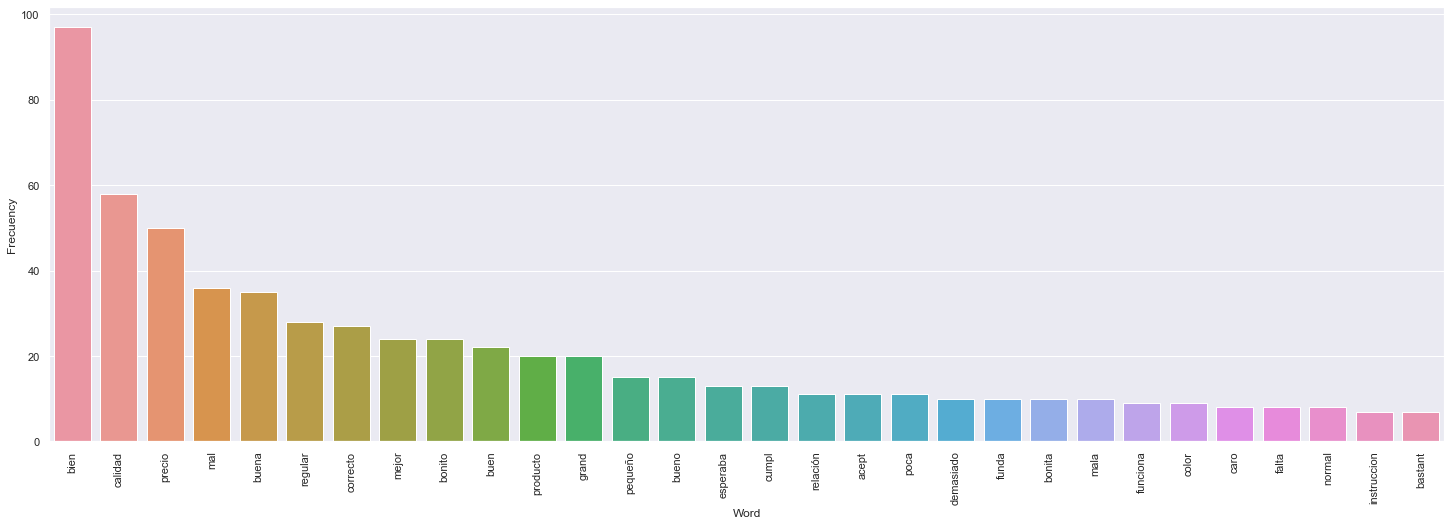

In [55]:
plt.figure(figsize = (25,8))
plot_3 = sns.barplot(x  = df_freq_3.iloc[:30].Word, y = df_freq_3.iloc[:30].Frecuency)
for item in plot_3.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [56]:
dataset_stars_4= dataset[dataset.stars==4]
dataset_stars_4

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_stem
3000,es_0638126,product_es_0921838,reviewer_es_0467790,4,Son robustas y francamente cumplen con su come...,Gran juego de llaves.,es,home_improvement,robusta francament cumplen cometido juego llav...
3001,es_0957542,product_es_0016810,reviewer_es_0205107,4,Estupenda relación calidad-precio,Funcional,es,home_improvement,estupenda relación calidad-precio
3002,es_0571992,product_es_0161938,reviewer_es_0304170,4,Lo compré para mi madre. Esta muy contenta. Es...,compacto y cómodo,es,furniture,compré madr contenta compacto fácil usar excep...
3003,es_0469900,product_es_0182832,reviewer_es_0562273,4,"UN POCO ESTRECHO ,PERO VALE PARA LO QUE ES,PAR...",ESTA BIEN,es,home_improvement,estrecho vale pintura
3004,es_0832100,product_es_0922601,reviewer_es_0049840,4,Le doy cuatro estrellas porque aún no lo he pr...,Nice.,es,wireless,doy cuatro estrella aún probado 100 % día llev...
...,...,...,...,...,...,...,...,...,...
3995,es_0975468,product_es_0588879,reviewer_es_0279923,4,"Los estoy usando para hacer saco en casa, van ...",Justo lo que se ve en las fotos,es,sports,usando hacer saco casa van bien cuenta entrena...
3996,es_0272574,product_es_0427020,reviewer_es_0415826,4,Lo del antirrobo es lo que no entiendo me gust...,Gracias,es,wireless,antirrobo entiendo gusta estilo
3997,es_0274578,product_es_0070827,reviewer_es_0552234,4,Queda muy bien en la cama yo se lo regale a mi...,Queda muy bien en la cama abriga y es perfecto...,es,home,queda bien cama regal hermano queda perfecto c...
3998,es_0404396,product_es_0461650,reviewer_es_0333649,4,"Se trata de un producto cómodo, tiene gran cal...",Producto que destaca por su comodidades y graves.,es,electronics,trata producto cómodo gran calidad sonido grav...


In [57]:
review_4=[]
simb=["!",".",",","no","si","...",")","("]
todaslaspalabras_4=[]
for review in dataset_stars_4.review_title:
    review =review.lower()
    review=nltk.word_tokenize(review)
    review= [palabra for palabra in review if not palabra in stopwords if not palabra in simb]
    review=[stemmer_1.stem(palabra) for palabra in review]
    todaslaspalabras_4.append(review)
    review=" ".join(review)
    review_4.append(review)
    flat_list_4s = [item for t in todaslaspalabras_4 for item in t]

In [58]:
flat_list_4s[0:30]

['gran',
 'juego',
 'llave',
 'funcion',
 'compacto',
 'cómodo',
 'bien',
 'nice',
 'calidad',
 'precio',
 'bastant',
 'completo',
 'cobran',
 'envio',
 'relación',
 'calidad',
 'precio',
 'excelent',
 'buen',
 'materi',
 'buen',
 'anclaj',
 'acept',
 'iluminación',
 'genial',
 'inest',
 'buen',
 'articulo',
 'nota',
 'pued']

In [59]:
freq_4star = nltk.FreqDist(flat_list_4s)
freq_4star
df_freq_4= pd.DataFrame(list(freq_4star.items()), columns = ["Word", "Frecuency"])
df_freq_4.sort_values('Frecuency',ascending=False, inplace = True)
df_freq_4.head()

,Word,Frecuency
35,buena,114
6,bien,98
8,calidad,79
16,buen,70
9,precio,68


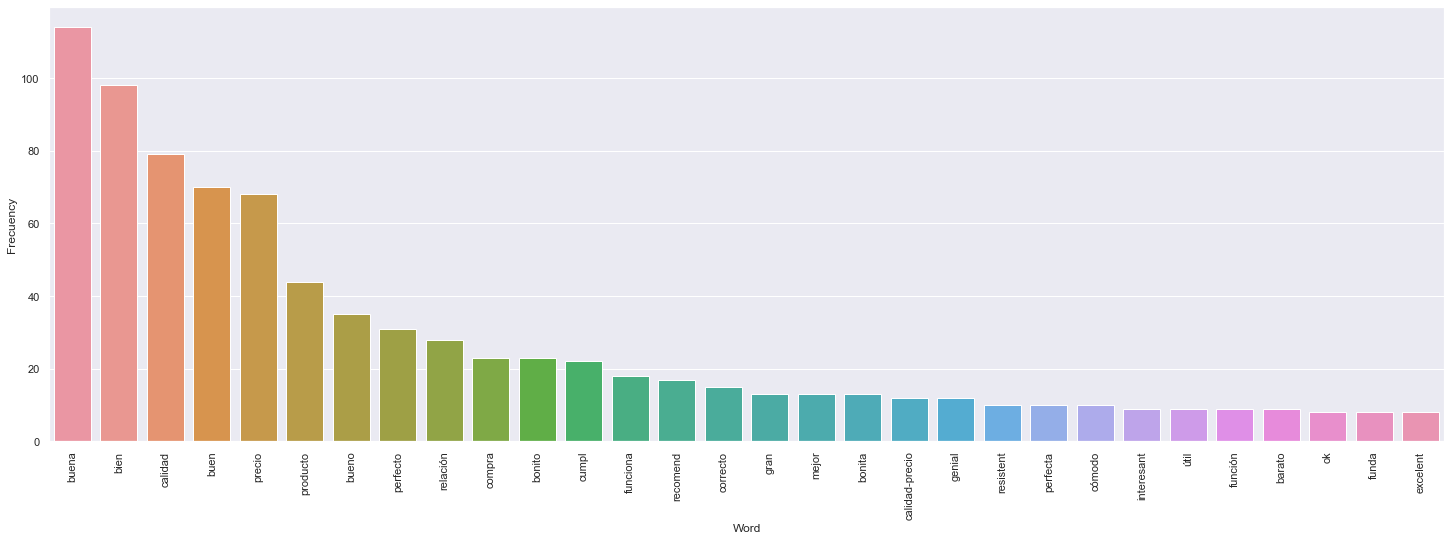

In [60]:
plt.figure(figsize = (25,8))
plot_4 = sns.barplot(x  = df_freq_4.iloc[:30].Word, y = df_freq_4.iloc[:30].Frecuency)
for item in plot_4.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [61]:
dataset_stars_5= dataset[dataset.stars==5]
dataset_stars_5


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_stem
4000,es_0973261,product_es_0163826,reviewer_es_0461590,5,"Mi pareja encantada con esta adquisición, prác...","Muy Útil, ligero y hace su papel para lo que es",es,toy,pareja encantada adquisición práctico útil tal...
4001,es_0285657,product_es_0396230,reviewer_es_0837511,5,En cuanto lo compré mi gato se olvidó de rasca...,Funciona,es,pet_products,cuanto compré gato olvidó rascar sofá
4002,es_0777148,product_es_0566248,reviewer_es_0269131,5,Café de excelente calidad. Las cápsulas sin al...,Cápsulas compatibles con maquina nespresso rec...,es,grocery,café excelent calidad cápsula aluminio compost...
4003,es_0554747,product_es_0244949,reviewer_es_0800916,5,Te atrapa desde el primer minuto!!! Lectura fá...,Te atrapa,es,digital_ebook_purchase,atrapa primer minuto lectura fácil rápida reco...
4004,es_0685602,product_es_0991354,reviewer_es_0579306,5,"Está muy bien montado, y resulta muy vistoso. ...",que sea lo pedido,es,jewelry,bien montado resulta vistoso gusta recomiendo
...,...,...,...,...,...,...,...,...,...
4995,es_0179515,product_es_0158275,reviewer_es_0273644,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,es,home,encantado cesta llegado impecable.tien tamaño ...
4996,es_0894902,product_es_0953259,reviewer_es_0153773,5,Desempeña su función correctamente,calidad precio,es,camera,desempeña función correctament
4997,es_0760496,product_es_0731995,reviewer_es_0171091,5,Me ha encantado la diadema! Las flores son tal...,Excelente,es,toy,encantado diadema flore tal vienen imagen vení...
4998,es_0178380,product_es_0402051,reviewer_es_0686937,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,es,wireless,gustan funda tpu funda normalment fina colorid...


In [62]:
review_5=[]
simb=["!",".",",","no","si","...",")","("]
todaslaspalabras_5=[]
for review in dataset_stars_5.review_title:
    review =review.lower()
    review=nltk.word_tokenize(review)
    review= [palabra for palabra in review if not palabra in stopwords if not palabra in simb]
    review=[stemmer_1.stem(palabra) for palabra in review]
    todaslaspalabras_5.append(review)
    review=" ".join(review)
    review_5.append(review)
    flat_list_5s = [item for t in todaslaspalabras_5 for item in t]

In [63]:
freq_5star = nltk.FreqDist(flat_list_5s)
freq_5star
df_freq_5= pd.DataFrame(list(freq_5star.items()), columns = ["Word", "Frecuency"])
df_freq_5.sort_values('Frecuency',ascending=False, inplace = True)
df_freq_5.head()

,Word,Frecuency
23,calidad,84
80,buen,83
22,buena,77
36,perfecto,71
59,producto,52


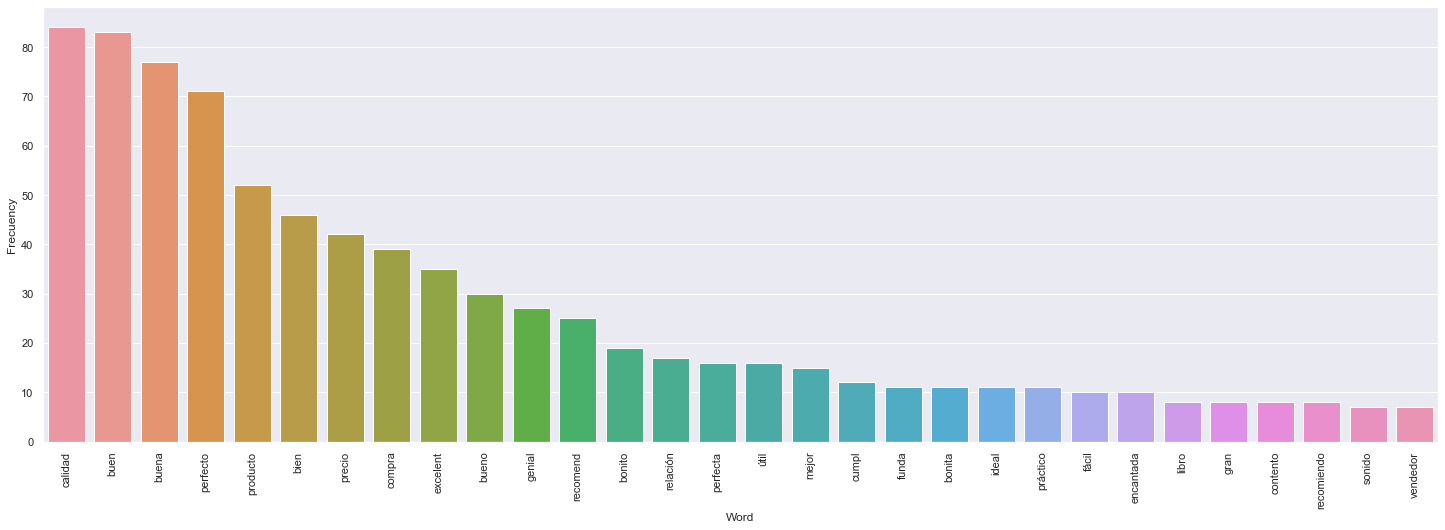

In [64]:
plt.figure(figsize = (25,8))
plot_5 = sns.barplot(x  = df_freq_5.iloc[:30].Word, y = df_freq_5.iloc[:30].Frecuency)
for item in plot_5.get_xticklabels():
    item.set_rotation(90)
plt.show()

## Vectorización

In [ ]:
from textblob import TextBlob


In [ ]:
txt= TextBlob (review_list)

In [ ]:
txt= TextBlob("idiota")

In [ ]:
txt.detect_language()

In [ ]:
txt.sentiment

In [ ]:
nltk.download("averaged_perceptron_tagger")

In [ ]:
flat_list2.tags

In [ ]:
from textblob.sentiments import NaiveBayesAnalyzer
blob = TextBlob("Desastroso", analyzer=NaiveBayesAnalyzer())
blob.sentiment

In [ ]:
dataset["ReviewConcat"] = dataset.review_title+ " " + dataset.review_body
dataset.head()
